## They are late
This is a financial analytics project with deals with  a data set containing customer ID it and payment amount and other important features defining a clear picture on every individuals transaction with respect to my the payment

In [11]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

### Data Set
The data set that we haveis resourced from kegel with the title finance factoring of IBM late payment histories

In [2]:
ds = pd.read_csv('data.csv')
ds.head(5)

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


### Data Cleaning
in this stage we are describing the given data set and we further any null values in every in every feature if found we will replace it with the average of that feature.

In [3]:
ds.describe()

,countryCode,invoiceNumber,InvoiceAmount,DaysToSettle,DaysLate
count,2466.000000,2.466000e+03,2466.000000,2466.00000,2466.000000
mean,620.446067,4.978431e+09,59.895856,26.44485,3.442417
std,215.933610,2.884272e+09,20.435838,12.33493,6.290607
min,391.000000,6.113650e+05,5.260000,0.00000,0.000000
25%,406.000000,2.528854e+09,46.400000,18.00000,0.000000
50%,770.000000,4.964228e+09,60.560000,26.00000,0.000000
75%,818.000000,7.494512e+09,73.765000,35.00000,5.000000
max,897.000000,9.990244e+09,128.280000,75.00000,45.000000


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   PaperlessDate  2466 non-null   object 
 3   invoiceNumber  2466 non-null   int64  
 4   InvoiceDate    2466 non-null   object 
 5   DueDate        2466 non-null   object 
 6   InvoiceAmount  2466 non-null   float64
 7   Disputed       2466 non-null   object 
 8   SettledDate    2466 non-null   object 
 9   PaperlessBill  2466 non-null   object 
 10  DaysToSettle   2466 non-null   int64  
 11  DaysLate       2466 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 231.3+ KB


### Data Preprocessing
* As a part of data preprocessing we are going to find out the correlations between the features affecting the the late number of days of payment and furthermore we are going to input X&Y features to train the models in the further steps.
* I have also split the data into train and test set and further normalized using scalar function for optimal model making

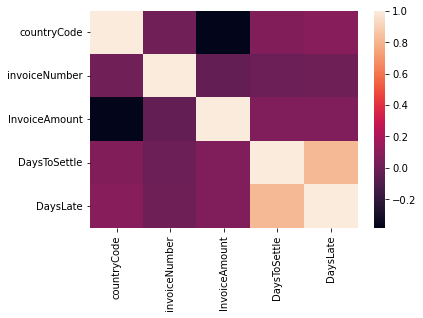

In [5]:
corelation_map = sb.heatmap(ds.corr(), annot=False)

In [6]:
ds.corr()

,countryCode,invoiceNumber,InvoiceAmount,DaysToSettle,DaysLate
countryCode,1.000000,0.015996,-0.384881,0.066341,0.090462
invoiceNumber,0.015996,1.000000,-0.032699,-0.005921,0.004402
InvoiceAmount,-0.384881,-0.032699,1.000000,0.060786,0.059980
DaysToSettle,0.066341,-0.005921,0.060786,1.000000,0.820552
DaysLate,0.090462,0.004402,0.059980,0.820552,1.000000


In [7]:
x = ds[['InvoiceAmount','DaysToSettle']]
y = ds[['DaysLate']]

In [8]:
x=x.astype('int')
y=y.astype('int')
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state = 0)

In [9]:
std_sclr = StandardScaler()
x_train = std_sclr.fit_transform(xtrain)
x_test = std_sclr.fit_transform(xtest)

### Data Modeling
for the analysis of man's related data I have use decision reclassifier due to high performance in classificationication

In [10]:
model2= DecisionTreeClassifier()
model2.fit(x_train,ytrain)
ypred2=model2.predict(x_test)
print("Predicted value= \n",ypred2)
cm_m2 = confusion_matrix(ytest,ypred2)
print("\n Confusion Matrix =\n",cm_m2)
Ac2 = accuracy_score(ytest,ypred2)*100
print("\nAccurecy=",round(Ac2,3))

Predicted value= 
 [ 0 17  0  5 16  0  0  0  0  0 11  0  0  0  0  0  5  0  0  0  0  0  7  5
 11  0 22  9  6 14  5  0  0 22  0  9  0  0  0  2  0  0  0  8  0 11  0  0
  0  8 22 26  6  0  6 14 18 26  0 11  0  0  8  2  0  0  0  0  0  0 16  4
  1  0 17  0  0  2  0  0  4  0 12  2  2  4  0  0  0  9  0  0  0 20  0  0
  0  0 14  5  7  0 24  0  0  7  0  0  0  0  0  0  8  4  0  0  0  2  0  0
  0  0  0  0  0  8  0  0  0  0  0  4  0  0  2 14  0  0  0  0  0  0  0  0
  0  1  0  0  0  0  0  0  0  7  0  6  2  0 10  0  0  0 22  0  0 13  0  5
  0 11  0  0  0  7 11 18  0  0  0 14  0  0  0  0 30  2  0  0  0  0  9  0
  0 15 20 14  8  2 14  5 13  0  0  0  0  0  0  0  1  5  7 10  0  0  0  0
 15  0  0  5  0  0  0  1  0  2  0 12  0 20 14  0  4  0  9  5  0  0  1  4
  5 15  0  0 14  0  0  0  0  0  0  0  9  0  0  3  6  8  0  5  7  0  8 13
  5  0  0  0 15  0  0 18  0  1  0  0  0  0 17  0  0  3 14  0  0  2  0  0
  0  0  0  0 21  0  0 14  4 11 22  4  0  0 17  0  0  0 22  0  1  3  0 15
  0  0  0  1  0  2  0  2  0  0 1

### Summary:-
* from the above state we can see a clear correlation between between number of payment days to the total amount of the payment and the of to pay it off.
* By the above analysis firstly we can understand the customers are charged an excessive amount.
* secondly we can observe that the number of days given for customers to complete the payment that is to pay the bill is proportionally less which causes increase in the delayed payment days.

Note: to get the clear picture of the data visualization please refer to the adjoining tableau dashboard